In [195]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [196]:
df = pd.read_csv('data/CC_Customer_Dataset.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [198]:
df= df.iloc[:, 2:7]

In [199]:
print(df.head())

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made  
0                    1                 0  
1                   10                 9  
2                    3                 4  
3                    1                 4  
4                   12                 3  


In [200]:
df.info

<bound method DataFrame.info of      Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
655             99000                  10                  1   
656             84000                  10                  1   
657            145000                   8                  1   
658            172000                  10                  1   
659            167000                   9                  0   

     Total_visits_online  Total_calls_made  
0                      1                 0  
1                     10                 9  
2                      3                 4  
3                  


# 1. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Apakah sebaran data dapat dikatakan linier?

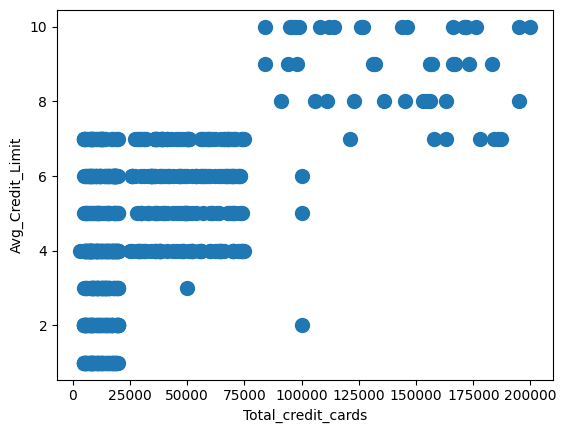

In [201]:

plt.xlabel('Total_credit_cards')
plt.ylabel('Avg_Credit_Limit')
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s = 100)


Sebaran data tidak linier, bisa dilihat pola terlihat tersebar secara horizontal pada Avg_Credit_Limit yang menunjukkan adanya banyak nilai diskrit pada variabel tersebut.

# 2. Buatlah model klasterisasi dengan menggunakan model K-Means. Tentukan jumlah k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

In [202]:
from sklearn.cluster import KMeans

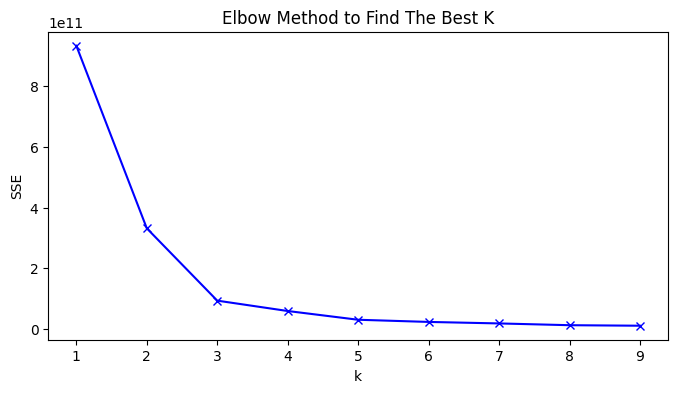

In [203]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(df)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()    

Analisis: Nilai K adalah 3, karena pada titik itu terjadi perubahan yang signifikan dari nilai k=2, dan nilai setelah k=3 linechart menjadi lebih stabil.

# 3. Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot.

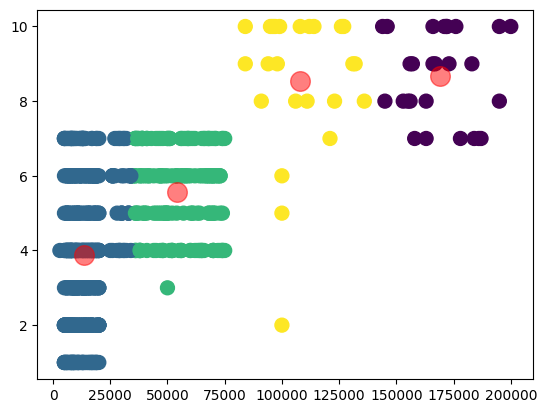

In [211]:
# Build a K-Means Model
# Based on visual inspection using scatterplot, 
# we can assumpt that the data has 2 cluster 
# (even though, from the label, there are 3 labels in this data) 

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=4)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(df)
# Plot the clustering result
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# 4. Buatlah model klasterisasi dengan menggunakan DBSCAN dengan seluruh variabel yang dapat digunakan.

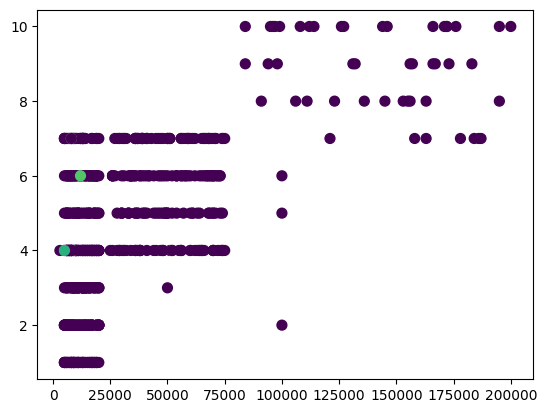

In [210]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=2)
cluster_db = dbscan.fit_predict(df)

plt.scatter(df[df.columns[0]], df[df.columns[1]], c=cluster_db, s=50, cmap='viridis')

# 5. Tentukan jumlah k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

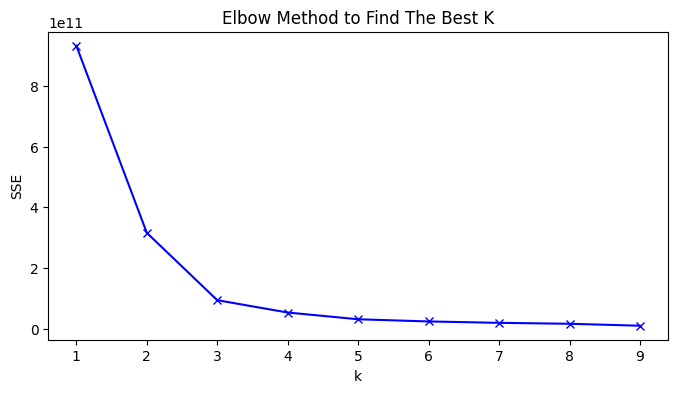

In [206]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(df)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()    

Analisis: Nilai K adalah 3, karena pada titik itu terjadi perubahan yang signifikan dari nilai k=2, dan nilai setelah k=3 linechart menjadi lebih stabil.

# 6. Tentukan nilai silhouette score dan DBI dari model DBSCAN.

In [207]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df, cluster_db))

-0.7633076877281624


Klaster yang dihasilkan tidak optimal. Banyak data poin yang lebih dekat ke klaster lain daripada klaster-nya sendiri.